In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from os import listdir
from os.path import join
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MaxAbsScaler
mydir = r'fotos'
a = []
y = []
for name in listdir(mydir):
    path = join(mydir, name)
    data = np.asarray(Image.open(path))
    a.append(data)
    cat = 0
    if name[0] == 'G':
        cat = 1
    elif name[0] == 'H':
        cat = 2
    y.append(cat)
X = np.array(a)
print(X.shape) 

(1575, 200, 150)


### Ejercicio 2

la clase verdadera es:  1


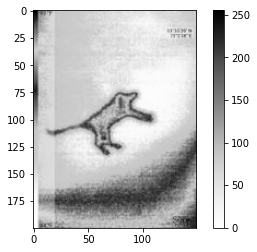

valor máximo en la imagen =  255
X_train shape: (1260, 200, 150, 1)
X_test shape: (315, 200, 150, 1)
1260 train samples
315 test samples
1
(1260, 3)
[0. 1. 0.]


In [2]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=0)
idx = 150
print('la clase verdadera es: ', y_train[idx])
plt.imshow(X_train[idx], cmap='Greys')
plt.colorbar()
plt.show()
print('valor máximo en la imagen = ', np.max(X_train[idx]))

# escala imagenes al rango 0-1 
X_train = X_train.astype("float32") / 255
X_test = X_test.astype("float32") / 255

X_train = np.expand_dims(X_train, -1) #agrega dimension extra
X_test = np.expand_dims(X_test, -1) #agrega dimension extra
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

print(X_train.shape[0], "train samples")
print(X_test.shape[0], "test samples")
# transforma la variable objetivo en un vector de clases
print(y_train[idx])
y_train = keras.utils.to_categorical(y_train, 3)
y_test = keras.utils.to_categorical(y_test, 3)
print(y_train.shape)
print(y_train[idx])

### Ejercicio 3

In [3]:
model = keras.Sequential([keras.Input(shape=(200,150,1)),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(), layers.Dropout(0.5),
        layers.Dense(3, activation="softmax"),])
model.summary()
batch_size = 80
epochs = 10
#compila el modelo, definiendo solver, metrica y funcion de costo
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
#comienza el entrenamiento
model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.12)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 148, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 36, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 110592)            0         
                                                                 
 dropout (Dropout)           (None, 110592)            0

### Ejercicio 4

In [4]:
model_2 = keras.Sequential([keras.Input(shape=(200,150,1)),
        layers.Conv2D(32, kernel_size=(8,8), activation="relu"),
        layers.MaxPooling2D(pool_size=(6,6)),
        layers.Conv2D(64, kernel_size=(8,8), activation="relu"),
        layers.MaxPooling2D(pool_size=(6,6)),
        layers.Flatten(), layers.Dropout(0.5),
        layers.Dense(3, activation="softmax"),])
model_2.summary()
batch_size_2 = 5
epochs_2 = 10
#compila el modelo, definiendo solver, metrica y funcion de costo
model_2.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
#comienza el entrenamiento
model_2.fit(X_train, y_train, batch_size=batch_size_2, epochs=epochs_2, validation_split=0.12)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 193, 143, 32)      2080      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 32, 23, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 25, 16, 64)        131136    
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 4, 2, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 512)               0         
                                                                 
 dropout_1 (Dropout)         (None, 512)              

### Ejercicio 5

In [5]:
# se eligio el primer modelo ya que entrega una mejor aproximación, al tener mejores valores de 
# accuracy
new_epochs = 20
model.fit(X_train, 
          y_train, 
          batch_size=batch_size, 
          epochs=new_epochs,
          validation_split=0.12,
          initial_epoch=epochs)

Epoch 11/20
14/14 [==============================] - 18s 1s/step - loss: 0.1211 - accuracy: 0.9603 - val_loss: 0.3124 - val_accuracy: 0.8816
Epoch 12/20
14/14 [==============================] - 17s 1s/step - loss: 0.0917 - accuracy: 0.9765 - val_loss: 0.2640 - val_accuracy: 0.9079
Epoch 13/20
14/14 [==============================] - 18s 1s/step - loss: 0.0824 - accuracy: 0.9847 - val_loss: 0.2689 - val_accuracy: 0.9276
Epoch 14/20
14/14 [==============================] - 17s 1s/step - loss: 0.0624 - accuracy: 0.9892 - val_loss: 0.2942 - val_accuracy: 0.8882
Epoch 15/20
14/14 [==============================] - 19s 1s/step - loss: 0.0568 - accuracy: 0.9847 - val_loss: 0.2599 - val_accuracy: 0.9276
Epoch 16/20
14/14 [==============================] - 17s 1s/step - loss: 0.0464 - accuracy: 0.9901 - val_loss: 0.2789 - val_accuracy: 0.9013
Epoch 17/20
14/14 [==============================] - 17s 1s/step - loss: 0.0431 - accuracy: 0.9928 - val_loss: 0.2846 - val_accuracy: 0.8947
Epoch 18/20
1

### Ejercicio 6

Test loss: 0.27347034215927124
Test accuracy: 0.9047619104385376
###############################################################


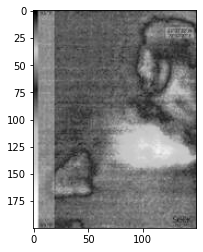

Verdadero: Hombre
Predicción: Auto


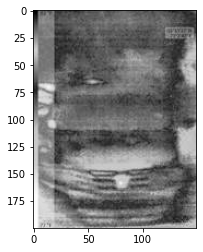

Verdadero: Auto
Predicción: Auto


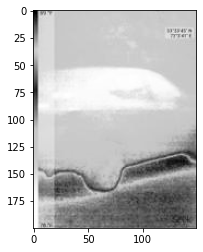

Verdadero: Auto
Predicción: Auto


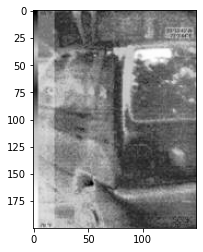

Verdadero: Auto
Predicción: Hombre

Total imágenes de test: 315
Buenas: 285
Errores: 30


In [6]:
#evalua el modelo para datos de test
score = model.evaluate(X_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])
print("###############################################################")

def catnum2name(n):
    name = "Auto"
    if n == 1:
        name = "Gato"
    elif n == 2:
        name = "Hombre"
    return name

#verifica predicciones para algunos datos
errcount = 0
biencount = 0
mostrar = 2
for idx in range(X_test.shape[0]):
    prediction = model.predict(np.expand_dims(X_test[idx], 0), verbose = 0)
    #contar
    if (np.argmax(y_test[idx]) != np.argmax(prediction)):
        bien = False
        errcount = errcount + 1
    else:
        bien = True
        biencount = biencount + 1
    #mostrar imagen
    if ((bien and biencount <= mostrar) or (not bien and errcount <= mostrar)):
        plt.imshow(X_test[idx], cmap='Greys')
        plt.show()
        print("Verdadero: " + catnum2name(np.argmax(y_test[idx])))
        print("Predicción: " + catnum2name(np.argmax(prediction)))
        
#mini resumen
print("\nTotal imágenes de test: " + str(X_test.shape[0]))
print("Buenas: " + str(biencount))
print("Errores: " + str(errcount))